# ANN Model

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

2023-01-06 11:00:10.776454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 11:00:10.887877: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-06 11:00:10.887893: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-06 11:00:11.530835: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# data loading from .npz generated from tcr_data_process.ipynb
# loading train data
npz = np.load('data_train.npz')
train_inputs = npz['input'].astype(np.float64)
train_targets = npz['targets'].astype(np.float64)
# loading validation data
npz = np.load('data_validation.npz')
validation_inputs, validation_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

npz = np.load('data_test.npz')
test_inputs, test_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

# ANN Model

Outline, Optimizer, Loss function, Early stopping and Training rate

In [3]:
# NN model prep
input_size = 3
output_size = 1
hidden_layer_1_size = 10
hidden_layer_2_size = 10
hidden_layer_3_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size),
    tf.keras.layers.Dense(hidden_layer_1_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_2_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_3_size, activation='sigmoid'),
    tf.keras.layers.Dense(output_size, activation='linear')
])


2023-01-06 11:00:12.272667: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-06 11:00:12.272688: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-06 11:00:12.272704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (uchp-parmar.icpf.cas.cz): /proc/driver/nvidia/version does not exist
2023-01-06 11:00:12.272893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# model prep, optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [5]:
# Training
BATCH_SIZE = 1
MAX_EPOCHS = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [6]:
# fit the model
history = model.fit(
    train_inputs, train_targets, batch_size=BATCH_SIZE,epochs=MAX_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=2
          )

Epoch 1/1000
640/640 - 1s - loss: 1.3673 - root_mean_squared_error: 1.1693 - val_loss: 1.3052 - val_root_mean_squared_error: 1.1425 - 1s/epoch - 2ms/step
Epoch 2/1000
640/640 - 1s - loss: 1.2544 - root_mean_squared_error: 1.1200 - val_loss: 1.1965 - val_root_mean_squared_error: 1.0938 - 565ms/epoch - 883us/step
Epoch 3/1000
640/640 - 1s - loss: 1.1499 - root_mean_squared_error: 1.0723 - val_loss: 1.0956 - val_root_mean_squared_error: 1.0467 - 678ms/epoch - 1ms/step
Epoch 4/1000
640/640 - 1s - loss: 1.0519 - root_mean_squared_error: 1.0256 - val_loss: 1.0008 - val_root_mean_squared_error: 1.0004 - 668ms/epoch - 1ms/step
Epoch 5/1000
640/640 - 1s - loss: 0.9594 - root_mean_squared_error: 0.9795 - val_loss: 0.9110 - val_root_mean_squared_error: 0.9545 - 551ms/epoch - 860us/step
Epoch 6/1000
640/640 - 1s - loss: 0.8720 - root_mean_squared_error: 0.9338 - val_loss: 0.8263 - val_root_mean_squared_error: 0.9090 - 593ms/epoch - 926us/step
Epoch 7/1000
640/640 - 1s - loss: 0.7895 - root_mean_sq

In [7]:
# ANN model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 3)                    12        
                                                                 
 dense_1 (Dense)             (1, 10)                   40        
                                                                 
 dense_2 (Dense)             (1, 10)                   110       
                                                                 
 dense_3 (Dense)             (1, 10)                   110       
                                                                 
 dense_4 (Dense)             (1, 1)                    11        
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


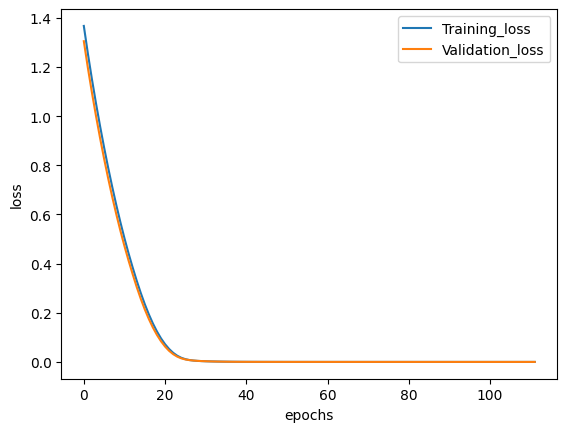

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Model check on Test data

In [9]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

3/3 [==============================] - 0s 2ms/step - loss: 1.4219e-05 - root_mean_squared_error: 0.0038


In [10]:
print('\nTest loss: {0:.4f}. Test accuracy: {1:.4f} rmse'.format(test_loss, test_accuracy))


Test loss: 0.0000. Test accuracy: 0.0038 rmse


In [11]:
prediction = model.predict(test_inputs)
data_inputs = pd.DataFrame(test_inputs)
prediction = pd.DataFrame(np.round(prediction,4))
test_targets = pd.DataFrame(test_targets)
pred_accu = np.round((prediction/test_targets)*100,2)

result = pd.concat([test_targets, prediction, pred_accu], axis = 1, ignore_index=True)
result.columns = ['Target-St(%)', 'Prediction-St(%)','Pred-Accu-St(%)']
result

3/3 [==============================] - 0s 1ms/step


,Target-St(%),Prediction-St(%),Pred-Accu-St(%)
0,0.97,0.9710,100.10
1,0.99,0.9907,100.07
2,0.99,0.9885,99.85
3,0.99,0.9906,100.06
4,0.96,0.9638,100.40
...,...,...,...
75,0.96,0.9529,99.26
76,0.98,0.9824,100.24
77,0.98,0.9795,99.95
78,0.93,0.9382,100.88


Text(0.5, 0, 'Targets (red) & Predictions (blue)')

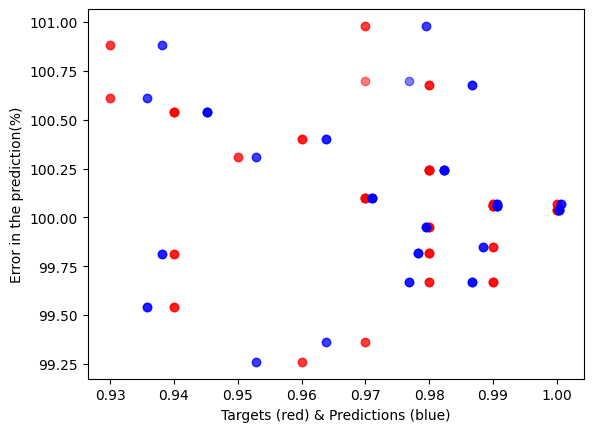

In [12]:
# plot of targets & predictions vs prediction deviation
import matplotlib.pyplot as plt
plt.scatter(result['Target-St(%)'], result['Pred-Accu-St(%)'], alpha=0.5, color='r')
plt.scatter(result['Prediction-St(%)'], result['Pred-Accu-St(%)'],alpha=0.5, color='b')
plt.ylabel('Error in the prediction(%)')
plt.xlabel('Targets (red) & Predictions (blue)')

Text(0.5, 0, 'Targets')

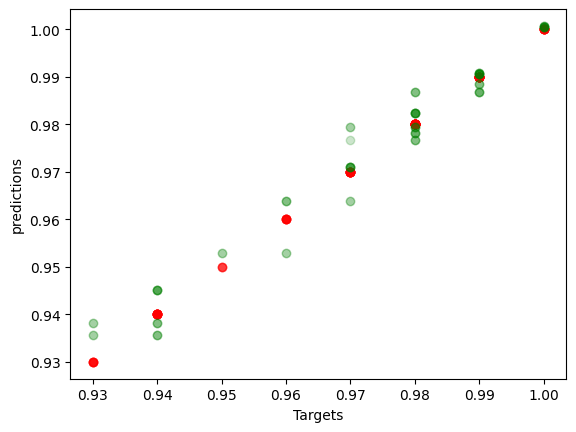

In [13]:
# plot of targets vs prediction comparision
plt.scatter(result['Target-St(%)'], result['Target-St(%)'], alpha=0.5, color='r')
plt.scatter(result['Target-St(%)'], result['Prediction-St(%)'], alpha=0.2, color='g')

plt.ylabel('predictions')
plt.xlabel('Targets')

In [14]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(test_targets, prediction)
np.round(r2_score_test,4)

0.9663

In [15]:
# estimation of adjusted R2 score
n = np.size(test_targets)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
np.round(adj_r2_score,4)

0.965

In [16]:
# estimation of uncertainty and accuracy of the model prediction over the test data
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ANN model:", np.round(uncertainty_model[0],2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],2), '[%]')

Uncertainty of the ANN model: 0.39 [%]
Average test prediction precision 99.61 [%]


# ANN Model Deployment

ANN model deployment for micro DSC error prediction

In [17]:
# deploying the ANN model
import keras
model.save('micro_dsc_dl.h5')